# Codes from Chapter 2 - Section 2 - Ascher and Greif - Second Edition


In [1]:
function bisection(func, a, b, fa, fb, atol, ftol)
    # Check input
    if (a >= b) || (fa * fb >= 0) || (atol <= 0)
        println("Something wrong with the input: quitting")
        return NaN, NaN, []
    end
    
    # Maximum iterations
    kmax = ceil(Int, log2((b - a) / 2) - log2(atol))
    xk = zeros(kmax)
    
    # Bisection algorithm
    for k in 1:kmax
        p = (a + b) / 2
        xk[k] = p
        fp = func(p)
        
        if abs(fp) < ftol
            return p, k, xk[1:k]
        end
        
        if fa * fp < 0
            b = p
        else
            a = p
            fa = fp
        end
    end
    
    p = (a + b) / 2
    return p, kmax, xk
end


bisection (generic function with 1 method)

## Example 2.3

Consider the rather simple nonlinear equation $x + \log(x) = 0$.  

This equation is well defined for real numbers, $x > 0$, i.e., on $\mathbb{R}^+$, and **it has only one zero.** 

To be convinced of this, we observe that the derivative of the continuous function $f(x) = x + \log(x)$ is $f'(x) = 1 + \frac{1}{x}$, and therefore $f'(x) > 0$ for $x > 0$. Therefore, the function $f(x)$ is monotonically strictly increasing for $0 < x < \infty$, and as such it can have at most one zero. 

Now, we know that the function $f(x)$ changes sign throughout the interval.

For example, 

$\log(1/e) = -\log(e) = -1$, and $\log(1) = 0$. 

Hence, $f(1/e) = 1/e - 1 < 0$ and $f(1) = 1 + \log(1) = 1 > 0$. 

Thus, by the Intermediate Value Theorem (page 10) the function must have a zero somewhere between $1/e = 0.3679$ and $1$.

### Figure 2.2


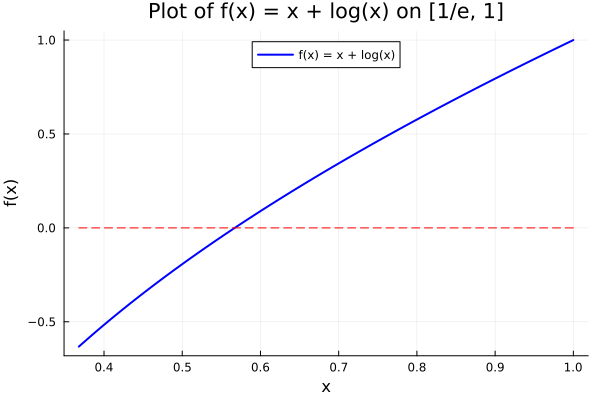

In [2]:
using Plots

# Define the function
f(x) = x + log(x)

# Define the range for x from 1/e to 1
x_vals = LinRange(1/exp(1), 1, 1000)

# Compute the corresponding f(x) values
y_vals = f.(x_vals)

# Find the zero x* of the function
x_star = exp(-1)  # 1/e
y_star = f(x_star)  # Should be 0

# Create the plot
plot(x_vals, y_vals, label="f(x) = x + log(x)", lw=2, legend=:top, color=:blue)
plot!(x_vals, zeros(length(x_vals)), label="", color=:red, linestyle=:dash)


# Add titles and labels
xlabel!("x")
ylabel!("f(x)")
title!("Plot of f(x) = x + log(x) on [1/e, 1]")



In Fig. 2.2 we plot the function in the above interval. A visual inspection further suggests that the zero is trapped between 0.5 and 0.6, so next we feed these values to our bisection function.


First, we feed the bisection function with the initial bracketed values and the required tolerances and spits out the results; this is the script we run. It produces the iterates xk with atol and ftol set to 1e-8.

In [3]:
f(x)=x+log(x)

f (generic function with 1 method)

In [4]:
x,k,xk = bisection(f,0,5,f(0),f(5),1e−8,1e−8)
println("Root is: ",x)
using Printf
for i in 1:k
    @printf("%d\t%.16f\n", i, xk[i])
end

Root is: 0.5671432893723249
1	2.5000000000000000
2	1.2500000000000000
3	0.6250000000000000
4	0.3125000000000000
5	0.4687500000000000
6	0.5468750000000000
7	0.5859375000000000
8	0.5664062500000000
9	0.5761718750000000
10	0.5712890625000000
11	0.5688476562500000
12	0.5676269531250000
13	0.5670166015625000
14	0.5673217773437500
15	0.5671691894531250
16	0.5670928955078125
17	0.5671310424804688
18	0.5671501159667969
19	0.5671405792236328
20	0.5671453475952148
21	0.5671429634094238
22	0.5671441555023193
23	0.5671435594558716
24	0.5671432614326477
25	0.5671434104442596
26	0.5671433359384537
27	0.5671432986855507
28	0.5671432800590992


In [5]:
x,k,xk = bisection(f,0,5,f(0),f(5),1e−15,1e−15)
println("Root is: ",x)

Root is: 0.567143290409784


### Recursive implementation

The bisection method is a favorite example in elementary computer programming courses, because in addition to its conceptual simplicity it admits a natural presentation in recursive form.

In [6]:
# Define the recursive bisection function
function bisection_recursive(func, a, b, fa, fb, atol, ftol)
    p = (a + b) / 2  # Midpoint

    # Base case: If the interval is smaller than the tolerance
    if (b - a) < 2 * atol
        return p
    else
        fp = func(p)  # Evaluate the function at the midpoint

        # Base case: If the function value is smaller than the tolerance
        if abs(fp) < ftol
            return p
        end

        # Recursive case: Narrow down the interval
        if fa * fp < 0
            b = p
            fb = fp
        else
            a = p
            fa = fp
        end

        # Recursive call
        return bisection_recursive(func, a, b, fa, fb, atol, ftol)
    end
end

bisection_recursive (generic function with 1 method)

In [7]:
x=bisection_recursive(f,0.5 ,0.6 , f(0.5) , f(0.6) ,1.e−10,1e−10);
println("Root is: ",x)

Root is: 0.5671432903967798
